In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# **Задание 1**

In [46]:
df = pd.read_csv('data.csv', delimiter = ',')
df

,X1,X2,y
0,3.745401,3.925880,24.826430
1,9.507143,0.998369,35.689535
2,7.319939,2.571172,31.986514
3,5.986585,2.962073,28.582797
4,1.560186,0.232252,8.666541
5,1.559945,3.037724,15.035440
6,0.580836,0.852621,7.987111
7,8.661761,0.325258,32.692923
8,6.011150,4.744428,32.865924
9,7.080726,4.828160,34.135458


In [47]:
np.random .seed(42)
X = np.random.rand(100, )
X = np.c_[X, 2 * X + np.random.normal(0, 0.1, 100)]
true_coefficients = np.array([1, 1])
y = X @ true_coefficients + np.random.normal(0, 0.1, 100)

def lasso_gradient_descent(X, y, alpha, learning_rate = 0.01, n_iterations = 1000):
  n_samples, n_features = X.shape
  coefficients = np.zeros(n_features)

  for _ in range(n_iterations):
    residuals = y -X @ coefficients
    gradient = - (2) * (X.T @ residuals) * learning_rate + alpha * np.sign(coefficients)

    coefficients -= learning_rate * gradient
  return coefficients

Коэффициенты Lasso
[0.20455002 1.35213115]


<function matplotlib.pyplot.show(close=None, block=None)>

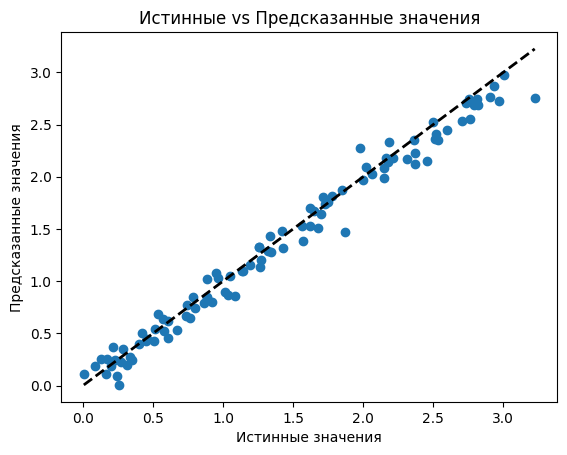

In [48]:
alpha = 0.1
coefficients = lasso_gradient_descent(X, y, alpha)

print('Коэффициенты Lasso')
print(coefficients)

y_pred = X @ coefficients
plt.scatter(y, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs Предсказанные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 2)
plt.show

In [49]:

# Генерация случайных данных для примера
np.random.seed(0)
X = np.random.rand(100, 10)  # 100 образцов, 10 признаков
y = X @ np.array([1.5, -2.0, 0.0, 0.0, 3.0, 0.0, 0.0, -1.0, 0.0, 0.0]) + np.random.normal(0, 0.5, 100)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Lasso
lasso = Lasso(alpha=0.1)  # alpha - параметр регуляризации
lasso.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = lasso.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score: ", r2)
print("Coefficients:", lasso.coef_)


Mean Squared Error: 0.670647433681431
R² Score:  0.6689050668803429
Coefficients: [ 0.52399131 -0.82840789  0.         -0.          2.02753418  0.
 -0.         -0.         -0.          0.        ]


Задание 2

In [50]:
data = pd.read_csv('boston.csv')
X = data.iloc[:, :-1].values  # Все столбцы кроме последнего — признаки
y = data.iloc[:, -1].values   # Последний столбец — целевая переменная

In [51]:
# 2. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Создание и обучение модели Lasso-регрессии
alpha = 0.1  # Параметр регуляризации
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# 4. Предсказание на тестовых данных
y_pred = lasso.predict(X_test)

# 5. Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Вывод результатов
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R²):", r2)
print("Коэффициенты модели Lasso:", lasso.coef_)

Среднеквадратичная ошибка (MSE): 25.15559375393417
Коэффициент детерминации (R²): 0.6569712802223937
Коэффициенты модели Lasso: [-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442]


не работает ⛹

Коэффициенты модели Ridge: [ 71.14655655  81.3612116   10.41135309  35.87014338 -68.57173247
 -91.62215399   0.52656169 -72.88064444 -34.53865085   0.40422005
  41.29140902  -0.21206662 -16.19617088]


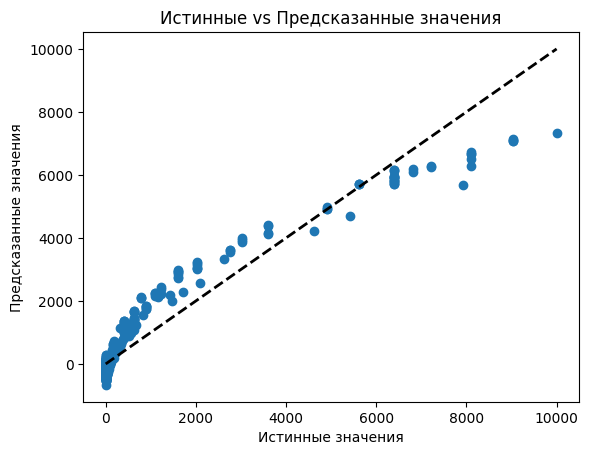

In [52]:
y = X[:,0]**2 * true_coefficients[0] + X[:,1]**2 * true_coefficients[1] + np.random.normal(0, 0.1, X.shape[0])

alpha = 7
# Вычисление коэффициентов Ridge регрессии
I = np.eye(X.shape[1]) # Единичная матрица
# Не регуляризуем свободный член
coefficients = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
y_pred = X @ coefficients
# Вывод коэффициентов
print("Коэффициенты модели Ridge:", coefficients)
# Визуализация истинных и предсказанных значений
y_pred = X @ coefficients
plt.scatter(y, y_pred)
plt. xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.title("Истинные vs Предсказанные значения")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

Задание 3

In [53]:

from sklearn.linear_model import Ridge

# 1. Загрузка данных
data = pd.read_csv('boston.csv')  # Замените 'boston.csv' на путь к вашему файлу
X = data.iloc[:, :-1].values  # Все столбцы, кроме последнего — признаки
y = data.iloc[:, -1].values   # Последний столбец — целевая переменная

# 2. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Создание и обучение модели Ridge-регрессии
alpha = 0.1  # Параметр регуляризации
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# 4. Предсказание на тестовых данных
y_pred = ridge.predict(X_test)

# 5. Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Вывод результатов
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R²):", r2)
print("Коэффициенты модели Ridge:", ridge.coef_)

Среднеквадратичная ошибка (MSE): 24.30102550019274
Коэффициент детерминации (R²): 0.6686244122021412
Коэффициенты модели Ridge: [-1.12399694e-01  3.04593914e-02  3.48958400e-02  2.75033318e+00
 -1.59244585e+01  4.44577949e+00 -7.30474388e-03 -1.42960751e+00
  2.60042840e-01 -1.07802286e-02 -9.00771040e-01  1.24004789e-02
 -5.10902332e-01]


Итоговое задание

In [54]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge

# 1. Загрузка данных
data = pd.read_csv('Nedvig.csv', encoding='cp1251', sep=';')  # Замените 'boston.csv' на путь к вашему файлу

# Кодирование категориальных данных
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

data = data.dropna()

X = data.iloc[:, :-1].values  # Все столбцы, кроме последнего — признаки
y = data.iloc[:, -1].values   # Последний столбец — целевая переменная




# 2. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:

# 3. Создание и обучение модели Lasso-регрессии
alpha = 0.1  # Параметр регуляризации
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# 4. Предсказание на тестовых данных
y_pred = lasso.predict(X_test)

# 5. Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Вывод результатов
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R²):", r2)
print("Коэффициенты модели Lasso:", lasso.coef_)

Среднеквадратичная ошибка (MSE): 352235.3207600955
Коэффициент детерминации (R²): 0.5769053950613253
Коэффициенты модели Lasso: [ -0.12406642  16.86677908 -33.02147272 -71.651475    95.67947066
  21.17456005  10.18005609  31.57444414]


In [56]:
# 3. Создание и обучение модели Ridge-регрессии
alpha = 0.1  # Параметр регуляризации
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# 4. Предсказание на тестовых данных
y_pred = ridge.predict(X_test)

# 5. Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 6. Вывод результатов
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R²):", r2)
print("Коэффициенты модели Ridge:", ridge.coef_)


Среднеквадратичная ошибка (MSE): 352250.55370379955
Коэффициент детерминации (R²): 0.5768870977018083
Коэффициенты модели Ridge: [ -0.1243762   16.9004497  -33.26774083 -71.75747342  96.27592159
  21.17047523  10.19201832  31.58337139]
